# <center> ASSESSMENT 3 </center>

## Implement the K-Means Clustering and Principal Component Analysis algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization.

## STEP 1: Reading the dataset into a DataFrame

In [293]:
import pandas as pd
df = pd.read_csv("Iris Dataset.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [294]:
# Retrieving the column information
df.columns 

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [295]:
# Retrieving statistics of all columns
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [296]:
# Retrieving data-types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [297]:
# Information about null values in each column
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## STEP 2: Data Preprocessing

In [298]:
# Separating features and label
import numpy as np
species = df["Species"].values
X = df.drop(columns=["Species"]).values

# Normalize features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std
X_norm

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

## STEP 3: Implementing PCA

In [299]:
def pca(data, n=3):
    
    cov = np.cov(data.T)# Covariance matrix

    eig_vals, eig_vecs = np.linalg.eig(cov) # Eigen decomposition
    
    idx = np.argsort(eig_vals)[::-1] # Sort eigenvalues and eigenvectors
    eig_vals = eig_vals[idx][:n]
    eig_vecs = eig_vecs[:, idx][:, :n]

    reduced = data @ eig_vecs  # Project data (@ being matrix multiplication operator)

    return reduced, eig_vals, eig_vecs

In [300]:
X_pca, eigen_vals, eigen_vecs = pca(X_norm)
print("Top 3 Eigenvalues:", eigen_vals)

Top 3 Eigenvalues: [3.7603354  0.92794917 0.23570257]


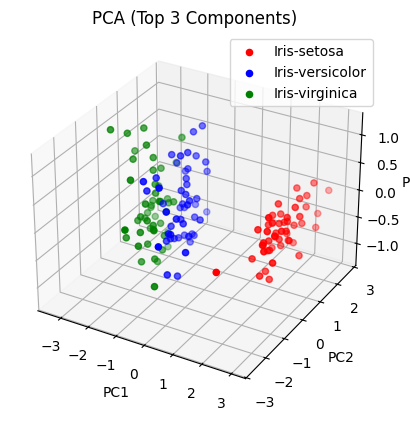

In [301]:
# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color map for species
color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

for sp in np.unique(species):
    mask = species == sp
    ax.scatter(*X_pca[mask].T, color=color_map[sp], label=sp)

ax.set_title("PCA (Top 3 Components)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

## Implementing K-Means Clustering

In [302]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

def kmeans(data, K, max_iters=100):
    np.random.seed(42)
    centroids = data[np.random.choice(len(data), K, replace=False)]
    
    for _ in range(max_iters):
        clusters = [[] for _ in range(K)]
        
        for point in data:
            dists = [euclidean(point, c) for c in centroids]
            clusters[np.argmin(dists)].append(point)
        
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] 
                                  for i, cluster in enumerate(clusters)])
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    labels = []
    for point in data:
        dists = [euclidean(point, c) for c in centroids]
        labels.append(np.argmin(dists))

    return np.array(labels), np.array(centroids), clusters

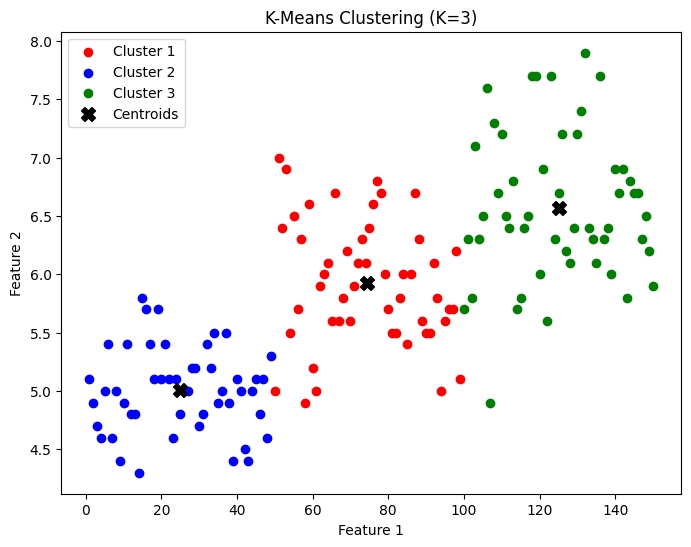

In [303]:
# K-Means Visualization
K = 3
cluster_labels, final_centroids, final_clusters = kmeans(X, K)

colors = ['red', 'blue', 'green']
plt.figure(figsize=(8, 6))
for i in range(K):
    cluster = np.array(final_clusters[i])
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}')
    
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering (K=3)")
plt.legend()
plt.show()

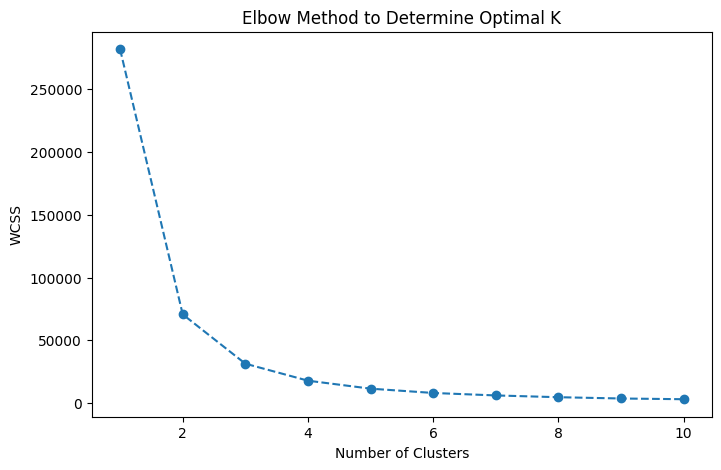

In [304]:
# Elbow method to find optimal no. of K
def wcss(data, k_range):
    wcss = []
    final_labels = None  
    for k in k_range:
        labels, centroids, clusters = kmeans(data, k)
        if k == max(k_range):  # Only save labels from the last iteration
            final_labels = labels
        sse = 0
        for i in range(k):
            cluster = np.array(clusters[i])
            if len(cluster) > 0:
                sse += np.sum((cluster - centroids[i])**2)
        wcss.append(sse)
    return wcss, final_labels

k_range = range(1, 11)
vals, labels = wcss(X, k_range)

plt.figure(figsize=(8, 5))
plt.plot(k_range, vals, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

### The optpimal value of K is 3 from the above graph

## STEP 4: Performance Evaluation

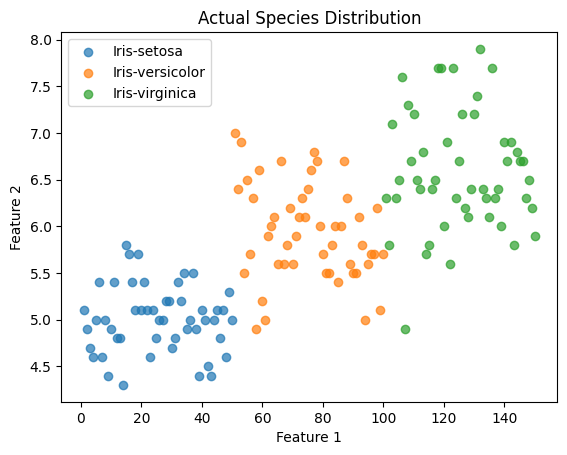

In [305]:
# K-Means

for label in np.unique(species):
    mask = species == label
    plt.scatter(X[mask, 0], X[mask, 1], label=label, alpha=0.7)

plt.title("Actual Species Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [306]:
# Calculating silhouette score
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5021


## Conclusion

### The clustering is moderately good (Silhouette Score of 0.50), but further optimization is needed for clearer, more distinct clusters.Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset while retaining most of the variance. This helped in simplifying the feature space, potentially improving model efficiency and reducing multicollinearity